In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
df = pd.read_csv("DataSets/tips.csv")
df.head

<bound method NDFrame.head of      total_bill   tip  gender smoker   day    time  size  price_per_person  \
0         16.99  1.01  Female     No   Sun  Dinner     2              8.49   
1         10.34  1.66    Male     No   Sun  Dinner     3              3.45   
2         21.01  3.50    Male     No   Sun  Dinner     3              7.00   
3         23.68  3.31    Male     No   Sun  Dinner     2             11.84   
4         24.59  3.61  Female     No   Sun  Dinner     4              6.15   
..          ...   ...     ...    ...   ...     ...   ...               ...   
239       29.03  5.92    Male     No   Sat  Dinner     3              9.68   
240       27.18  2.00  Female    Yes   Sat  Dinner     2             13.59   
241       22.67  2.00    Male    Yes   Sat  Dinner     2             11.34   
242       17.82  1.75    Male     No   Sat  Dinner     2              8.91   
243       18.78  3.00  Female     No  Thur  Dinner     2              9.39   

             Payer Name     CC Nu

In [7]:
q1 = np.percentile(df['total_bill'], 25)
q3 = np.percentile(df['total_bill'], 75)

iqr = q3 - q1

lower_bond = q1 -(1.5*iqr)
upper_bond = q3 + (1.5*iqr)


mask = (df['total_bill'] < lower_bond) | (df['total_bill'] > upper_bond)

# select rows that are outliers
outliers = df[mask]

print("Q1: ", q1)
print("Q3: ", q3)
print("IQR: ", iqr)
print("Outliers:")
print(outliers)

Q1:  13.3475
Q3:  24.127499999999998
IQR:  10.779999999999998
Outliers:
     total_bill    tip  gender smoker   day    time  size  price_per_person  \
59        48.27   6.73    Male     No   Sat  Dinner     4             12.07   
102       44.30   2.50  Female    Yes   Sat  Dinner     3             14.77   
142       41.19   5.00    Male     No  Thur   Lunch     5              8.24   
156       48.17   5.00    Male     No   Sun  Dinner     6              8.03   
170       50.81  10.00    Male    Yes   Sat  Dinner     3             16.94   
182       45.35   3.50    Male    Yes   Sun  Dinner     3             15.12   
184       40.55   3.00    Male    Yes   Sun  Dinner     2             20.27   
197       43.11   5.00  Female    Yes  Thur   Lunch     4             10.78   
212       48.33   9.00    Male     No   Sat  Dinner     4             12.08   

          Payer Name     CC Number Payment ID  
59       Brian Ortiz  6.596450e+15    Sat8139  
102    Heather Cohen  3.797710e+14    Sat

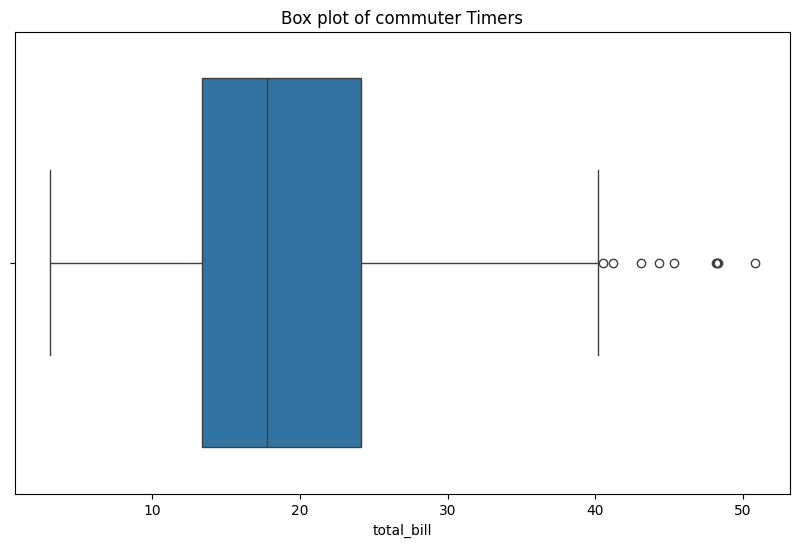

In [10]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(df['total_bill'], orient= 'h')
plt.title("Box plot of commuter Timers")
plt.xlabel("total_bill")
plt.show()

In [ ]:
df1 = pd.read_csv("titanic.csv")
df1.dropna(subset=['age'],inplace=True)
df1.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [22]:
five_point_summary = df1['age'].describe()[['min','25%','50%','75%','max']]
print(five_point_summary)

q1 = df1['age'].quantile(0.25)
q3 = df1['age'].quantile(0.75)

iqr = q3-q1

print("IQR: ",iqr)

lower_bond = q1 - (1.5*iqr)
upper_bond = q3 +(1.5*iqr)
print("lower_bond: ",lower_bond)
print("upper_bond: ",upper_bond)

outliers = df1[(df1['age'] < lower_bond) | (df1['age']> upper_bond)]
print("outliers: ",outliers)

min     0.420
25%    20.125
50%    28.000
75%    38.000
max    80.000
Name: age, dtype: float64
IQR:  17.875
lower_bond:  -6.6875
upper_bond:  64.8125
outliers:       survived  pclass gender   age  sibsp  parch     fare embarked deck
33          0       2   male  66.0      0      0  10.5000        S  NaN
54          0       1   male  65.0      0      1  61.9792        C    B
96          0       1   male  71.0      0      0  34.6542        C    A
116         0       3   male  70.5      0      0   7.7500        Q  NaN
280         0       3   male  65.0      0      0   7.7500        Q  NaN
456         0       1   male  65.0      0      0  26.5500        S    E
493         0       1   male  71.0      0      0  49.5042        C  NaN
630         1       1   male  80.0      0      0  30.0000        S    A
672         0       2   male  70.0      0      0  10.5000        S  NaN
745         0       1   male  70.0      1      1  71.0000        S    B
851         0       3   male  74.0      0     

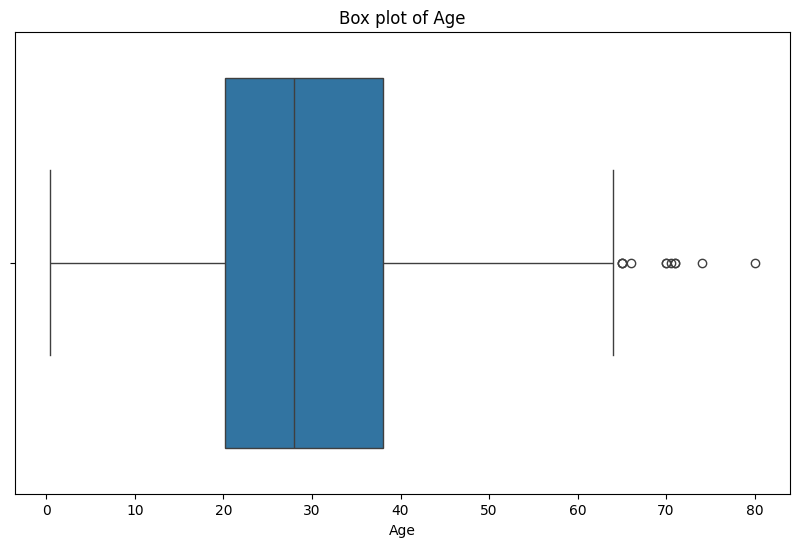

In [23]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(df1['age'], orient= 'h')
plt.title("Box plot of Age")
plt.xlabel("Age")
plt.show()

In [27]:
df1['age_mean']=df1['age'].fillna(df1['age'].mean())
df1['age_mode']=df1['age'].fillna(df1['age'].mode()[0])
df1['age_median']=df1['age'].fillna(df1['age'].mean())
df1.head

<bound method NDFrame.head of      survived  pclass  gender   age  sibsp  parch     fare embarked deck  \
0           0       3    male  22.0      1      0   7.2500        S  NaN   
1           1       1  female  38.0      1      0  71.2833        C    C   
2           1       3  female  26.0      0      0   7.9250        S  NaN   
3           1       1  female  35.0      1      0  53.1000        S    C   
4           0       3    male  35.0      0      0   8.0500        S  NaN   
..        ...     ...     ...   ...    ...    ...      ...      ...  ...   
885         0       3  female  39.0      0      5  29.1250        Q  NaN   
886         0       2    male  27.0      0      0  13.0000        S  NaN   
887         1       1  female  19.0      0      0  30.0000        S    B   
889         1       1    male  26.0      0      0  30.0000        C    C   
890         0       3    male  32.0      0      0   7.7500        Q  NaN   

     age_mean  age_mode  age_median  
0        22.0      

In [ ]:
On_board_Service = df['On-board Service']

mean = On_board_Service.mean()
median = On_board_Service.median()
mode = On_board_Service.mode()[0]